<a href="https://colab.research.google.com/github/Naveensadanandan/Pytorch/blob/main/04_Custom_datasets_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [4]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.


### setting up train and test directories path

---



In [6]:
train_path = image_path / "train"
test_path = image_path / "test"

train_path, test_path

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

# Visulaizing random images using PIL

sushi
random image height : 384
random image width : 512


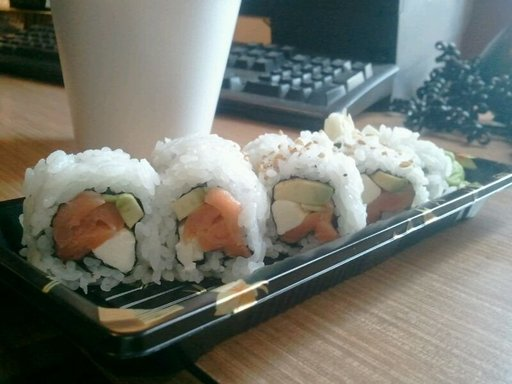

In [7]:
import random
from PIL import Image

image_paths = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_paths)

random_image_label = random_image_path.parent.stem

img = Image.open(random_image_path)

print(random_image_label)
print(f"random image height : {img.height}")
print(f"random image width : {img.width}")
img

# Visulazing random images using matplotlib

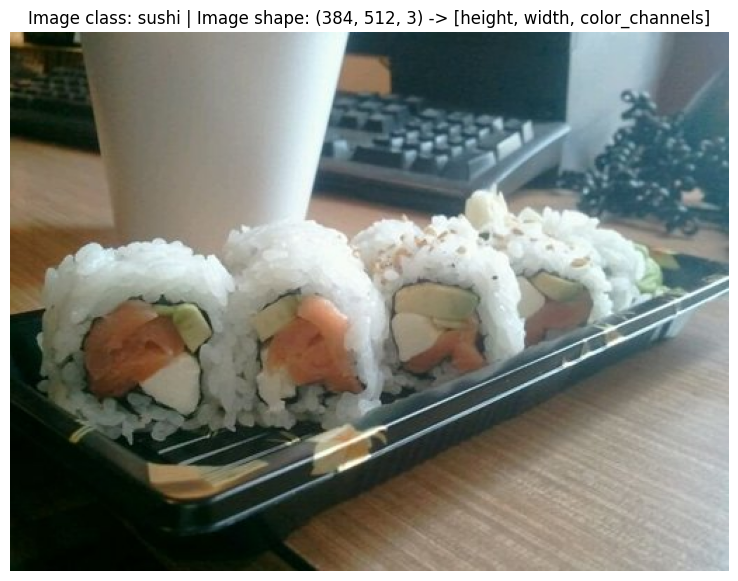

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {random_image_label} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

array([[[199, 167, 116],
        [194, 162, 111],
        [196, 163, 110],
        ...,
        [107, 124, 144],
        [108, 125, 145],
        [109, 126, 146]],

       [[201, 168, 117],
        [195, 162, 111],
        [196, 163, 110],
        ...,
        [107, 124, 144],
        [108, 125, 145],
        [108, 125, 145]],

       [[202, 166, 116],
        [196, 160, 110],
        [198, 162, 110],
        ...,
        [106, 123, 143],
        [107, 124, 144],
        [107, 124, 144]],

       ...,

       [[  1,  22,   5],
        [  1,  22,   5],
        [  3,  21,   5],
        ...,
        [183, 196, 202],
        [180, 193, 199],
        [178, 191, 197]],

       [[  0,  21,   4],
        [  0,  21,   4],
        [  0,  20,   3],
        ...,
        [183, 196, 202],
        [181, 194, 200],
        [178, 191, 197]],

       [[  0,  20,   3],
        [  0,  20,   3],
        [  0,  19,   2],
        ...,
        [182, 195, 201],
        [184, 197, 203],
        [184, 197, 203]]], dtype=uint8)
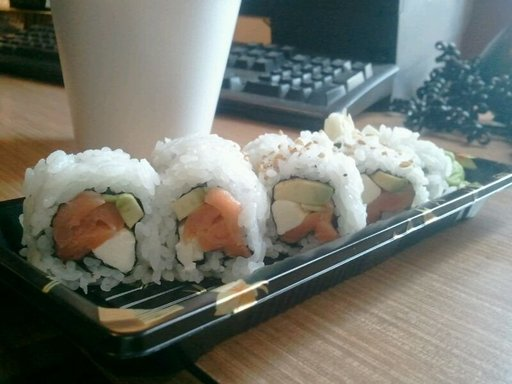

In [10]:
np.asarray(img)

# Transfroming data using torch.utils.data trasnforms

In [12]:
import torch
from torch.utils.data import dataloader
from torchvision import datasets, transforms

In [14]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()]
)

In [19]:
np.asarray(img).shape

(384, 512, 3)

In [21]:
data_transform(img).shape

torch.Size([3, 64, 64])

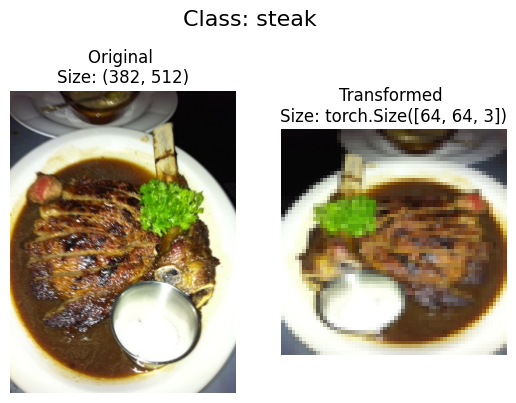

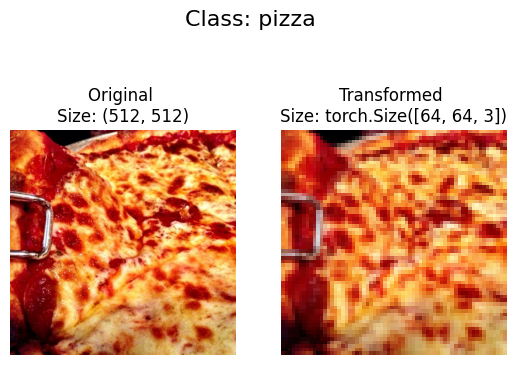

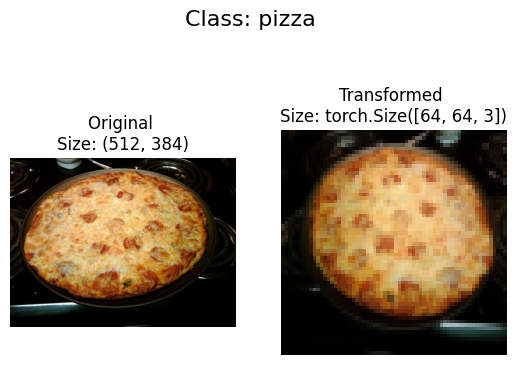

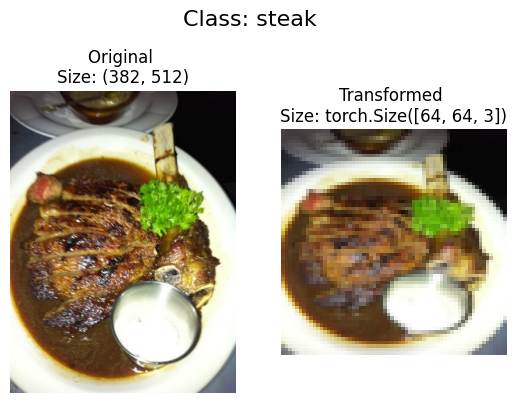

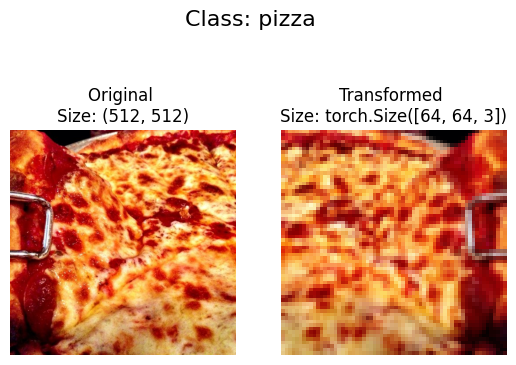

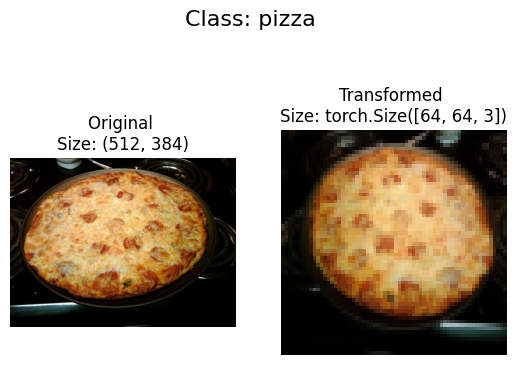

In [23]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths,
                        transform=data_transform,
                        n=3)